## 一维插值（interp1d)
基本调用格式：interp1d(x, y, kind = 'linear')
‘zero':0阶， ’slinear':1阶, 'quadratic':2阶，‘cubic':3阶

### Example 7.1
 * 下面示范了分段线性插值和三次样条插值

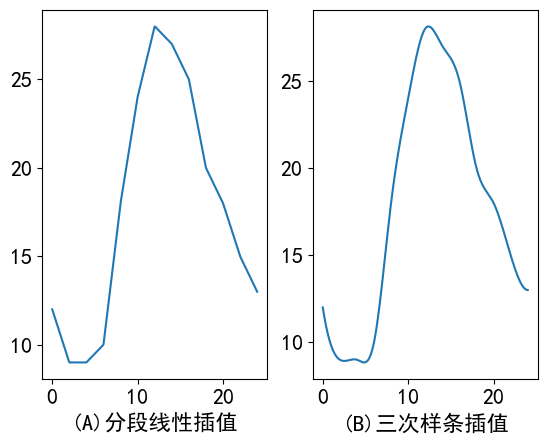

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

"""一维插值"""
# 基本调用格式：interp1d(x, y, kind = 'linear')
# ‘zero':0阶， ’slinear':1阶, 'quadratic':2阶
# ‘cubic':3阶。

x = np.arange(0, 25, 2)
y = np.array([12, 9, 9, 10, 18, 24, 28, 27, 25, 20, 18, 15, 13])
xnew = np.linspace(0, 24, 500)
f1 = interp1d(x, y)
y1 = f1(xnew)
f2 = interp1d(x, y, 'cubic')
y2 = f2(xnew)

plt.rc('font', size=16); plt.rc('font', family='SimHei')
plt.subplot(121); plt.plot(xnew, y1); plt.xlabel("(A)分段线性插值")
plt.subplot(122); plt.plot(xnew, y2); plt.xlabel("(B)三次样条插值")
plt.show()

## 二维插值(interp2d)
二维数据插值的两个首要问题：一是二维区域是任意区域还是规则区域；二是给定的数据是有规律分布的还是散乱，随机分布的。

第一个问题比较容易处理，只需将不观则区划分为规则区域或扩充为规则区
域来讨论即可。对于第二个问题，当给定的数据是有规律分布时，方法较多也较成
熟；而给定的数据是散乱、随机分布时，没有固定的方法，但一般的处理思想是从给
定的数据出发，依据一定的规律恢复出规则分布点上的数据，转化为数据分布有规
律的情形来处理

### Example 7.2(规则区域，规则分布)
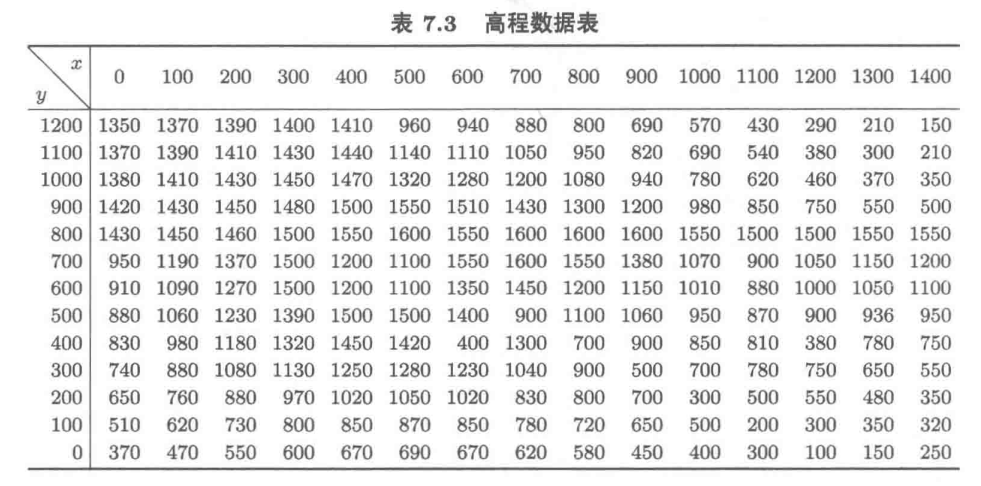
#### 步骤：
* 原始数据给出了100x100网格节点上的高程数据，为了提高计算精度，利用**双三次样条插值**，得到给定区域10x10网格节点上的高程数据
* 计算曲面面积：把平面区域x $\in$[0, 1400],y $\in$[0, 1200]剖分为140x120个10x10的矩形，对应地把所计算的三位曲面剖分成140x120个小曲面进行计算，将10x10网格4个点构成的两个三角形面积之和作为该网格曲面面积的近似值
* 绘制等高线图(contour)和三维曲面图

区域的面积为： 4782737.815311186


Text(0.5, 0, '$z$')

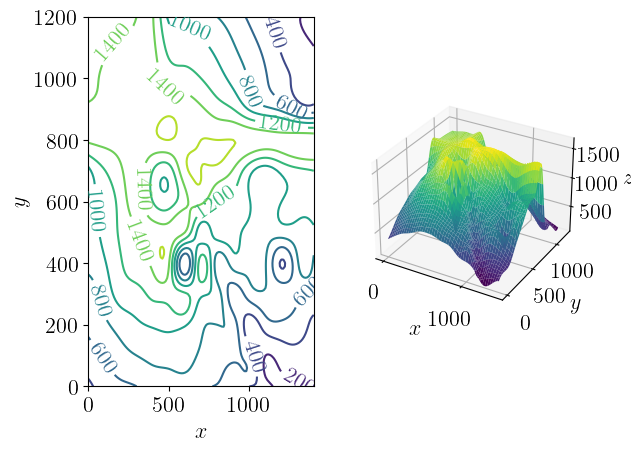

In [3]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from scipy.interpolate import interp2d
import latex

# 求二维插值函数
z=np.loadtxt(r".\Pdata7_5.txt")
x=np.arange(0, 1500, 100)
y=np.arange(1200, -100, -100)
f=interp2d(x, y, z, 'cubic')

xn=np.linspace(0, 1400, 141)
yn=np.linspace(0, 1200, 121)
zn=f(xn, yn)

# 求曲面面积的和
m=len(xn);n=len(yn);s=0;
for i in np.arange(m-1):
    for j in np.arange(n-1):
        p1=np.array([xn[i], yn[j], zn[j, i]])
        p2=np.array([xn[i+1], yn[j], zn[j, i+1]])
        p3=np.array([xn[i+1], yn[j+1], zn[j+1, i+1]])
        p4=np.array([xn[i], yn[j+1], zn[j+1, i]])
        p12=norm(p1-p2);p23=norm(p3-p2);p13=norm(p3-p1)
        p14=norm(p4-p1);p34=norm(p4-p3)
        l1=(p12+p23+p13)/2
        s1=np.sqrt(l1*(l1-p12)*(l1-p23)*(l1-p13))
        l2=(p13+p14+p34)/2
        s2=np.sqrt(l2*(l2-p13)*(l2-p14)*(l2-p34))
        s=s+s1+s2     
print("区域的面积为：", s)

# 等高线图的绘制
plt.rc('font', size=16);plt.rc('text', usetex=True)
plt.subplot(121)
contr=plt.contour(xn, yn, zn)
plt.clabel(contr)
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=90)

# 三维表面图的绘制
ax=plt.subplot(122, projection='3d')
X, Y=np.meshgrid(xn, yn)
ax.plot_surface(X ,Y, zn, cmap='viridis')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

### Example 7.3(不规则分布)
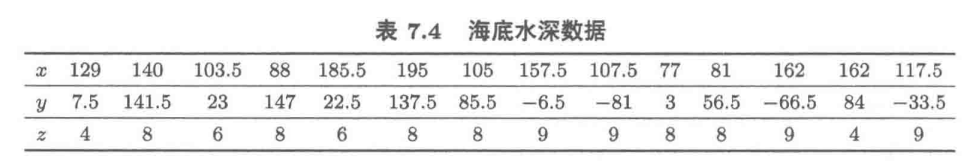

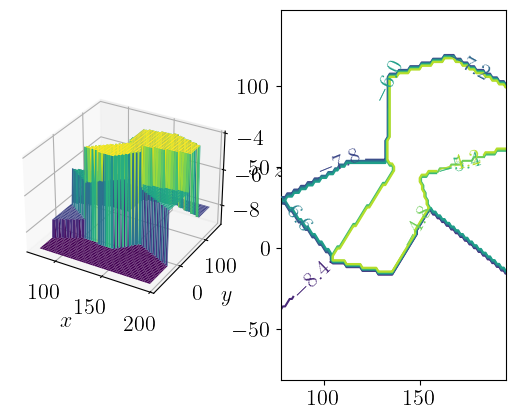

In [2]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

x = np.array([129, 140, 103.5, 88, 185.5, 195, 105, 157.5, 107.5, 77, 81, 162, 162, 117.5])
y = np.array([7.5, 141.5, 23, 147, 22.5, 137.5, 85.5, -6.5, -81, 3, 56.5, -66.5, 84, -33.5])  
z = -np.array([4, 8, 6, 8, 6, 8, 8, 9, 9, 8, 8, 9, 4, 9])
xy = np.vstack([x, y]).T

# 扩展二维区域为规则的区域
xn = np.linspace(x.min(), x.max(), 100)
yn = np.linspace(y.min(), y.max(), 100)
xng, yng = np.meshgrid(xn, yn) # 将xng,yng网格化成坐标数据

zn = griddata(xy, z, (xng, yng), method='nearest')

plt.rc('font', size=16); plt.rc('text', usetex=True)
ax = plt.subplot(121, projection='3d')
ax.plot_surface(xng, yng, zn, cmap='viridis')
ax.set_xlabel('$x$');ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

plt.subplot(122);c = plt.contour(xn, yn, zn, 8);plt.clabel(c)
plt.show()

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28]]
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14  0  2  4  6  8 10 12 14 16
 18 20 22 24 26 28]


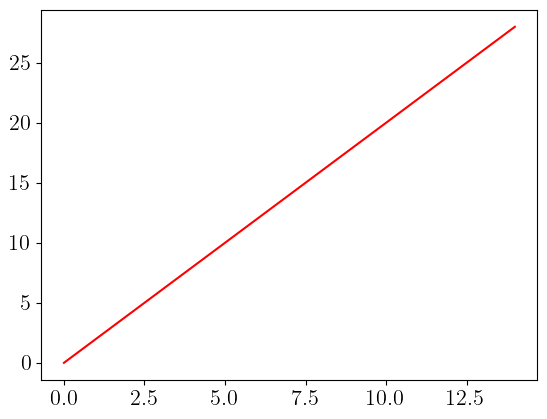

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = np.arange(0,15)
b = 2*a
c = np.stack((a,b))
d = np.vstack((a,b))
e = np.hstack((a,b))
print(c)
print(d)
print(e)
plt.plot(c[0],c[1],color='red')
plt.savefig('stack.png')